In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import datetime
import yfinance as yf

In [3]:
SandP500 = yf.Ticker("^GSPC").history(period='MAX') # retrieves S&P500 data via Yahoo Finance API

In [4]:
# This next block computes my measure of volatility for the data retrieved

High = SandP500['High'] 
Low = SandP500['Low']
day_range = abs((High)-(Low))
day_mean = (abs(High)+abs(Low))/2
SDR = ((day_range/(day_mean))*1000)+10

In [5]:
SandP500['Wills Volatility Measure'] = SDR # Adds my computed volatilities as an additional dataframe column

In [6]:
SandP500 = SandP500.loc['1990-01-01':'2021-10-06']

In [7]:
# I will calculate yearly volatility average (there are 252 trading days per year)
box = [] 
for y in range(0,11):
    box.append(0)
for x in range(252,len(SandP500),252):
    box.append((sum(SandP500['Wills Volatility Measure'][x-252:x])/252))

In [8]:
# Read in weather events data to align
data = pd.read_csv('time-series-US-1980-2021.csv')
data['yearly average volatility'] = box
df = data.iloc[11:] # drop first 11 years to align data

<ipython-input-9-047fb4798e32>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(x[:, np.newaxis], y)


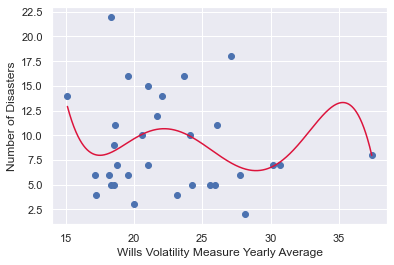

In [9]:
# Now I can regress year number of climate disasters on volatility

x = df['yearly average volatility']
y = df['All Disasters Count']

poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.xlabel('Wills Volatility Measure Yearly Average')
plt.ylabel('Number of Disasters')

plt.savefig("volatility.png")

In [10]:
# there is no correlation between number of disasters in a year
# and mean stock market volatility